In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys, os
import math
from scipy import special
from matplotlib.animation import FuncAnimation
plt.rcParams['animation.ffmpeg_path']='‪C:\\FFmpeg\bin\ffmpeg.exe'

erf = special.erf

In [ ]:
x = np.linspace(-3,3,1000)
def Heat(x,t, alpha = 1):
    q = np.sqrt(4*alpha*t)
    return 1/2*(erf((1/2-x)/(q))-erf((-1/2-x)/(q)))

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(-3, 3), ylim=(0, 1), title = "One dimensional heat evolution")
line, = ax.plot([], [], lw=1)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    i = i*0.01
    if i != 0:
        y = Heat(x, i)
        line.set_data(x, y)
        line.set_label(f"t = {round(i,3)}")
        plt.legend(bbox_to_anchor=(1, 0.5))
    else:
        pass
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=50, blit=False)
ax.grid()
plt.xlabel(r"$x-axis$")
plt.ylabel(r"$u(x,t)$")

anim.save('Task1.gif', fps=10, extra_args=['-vcodec', 'libx264'],
         writer = 'pillow')

plt.show()

# Task 2
## We begin by making a meshgrid of a specific size

In [72]:
L = 50
x, y = np.linspace(0,50,L), np.linspace(0,50,L).reshape(-1,1)
X,Y = np.meshgrid(x,y, indexing = "xy")

# This works
### This produces a both a plot and an animation.
My problem is that it's not centered where I want it, it also scales with $L$ which it should not.

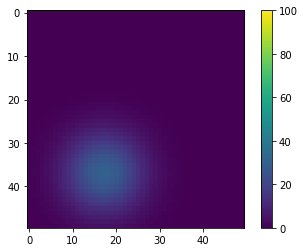

In [74]:
fig = plt.figure()
def Heat2(x,y,t = 0.0000001, alpha = 2):
    """ Returns the temperature at a time t, given a position (x,y)"""
    q = np.sqrt(4*alpha*t)
    r = np.sqrt((x-17.5)**2+(y-37.5)**2)
    k1 = 5/2 - r
    k2 = -5/2 - r
    return 100*(1/2*(erf(k1/q)-erf(k2/q)))


im = plt.imshow(Heat2(X, Y), animated=True)
def updatefig(*args):
    i = args[0]
    if i != 0:
        im.set_array(Heat2(X, Y, i*0.1))
        return im,
    else:
        a = (np.zeros([L,L]))
        #print(len(a))
        im.set_array(a)
        return im,

ani = FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.colorbar()
ani.save('Task2.gif', fps=10, extra_args=['-vcodec', 'libx264'],
         writer = 'pillow')
plt.show()


In [ ]:
#An animated image
#=================

#This example demonstrates how to animate an image.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
ani.save('test.gif', fps=10, extra_args=['-vcodec', 'libx264'],
         writer = 'pillow')
plt.show()